# Coding Project 1 : Linear Regression and Regularization

**Please write the names of all group members here:**




---


*Note:* The provided structure for the code below is only suggestive, and if you want to structure your programs differently you may do so.

### Question 1 - Importing the Data

Skewness of original data: 1.8828757597682129
Kurtosis of original data: 6.536281860064529


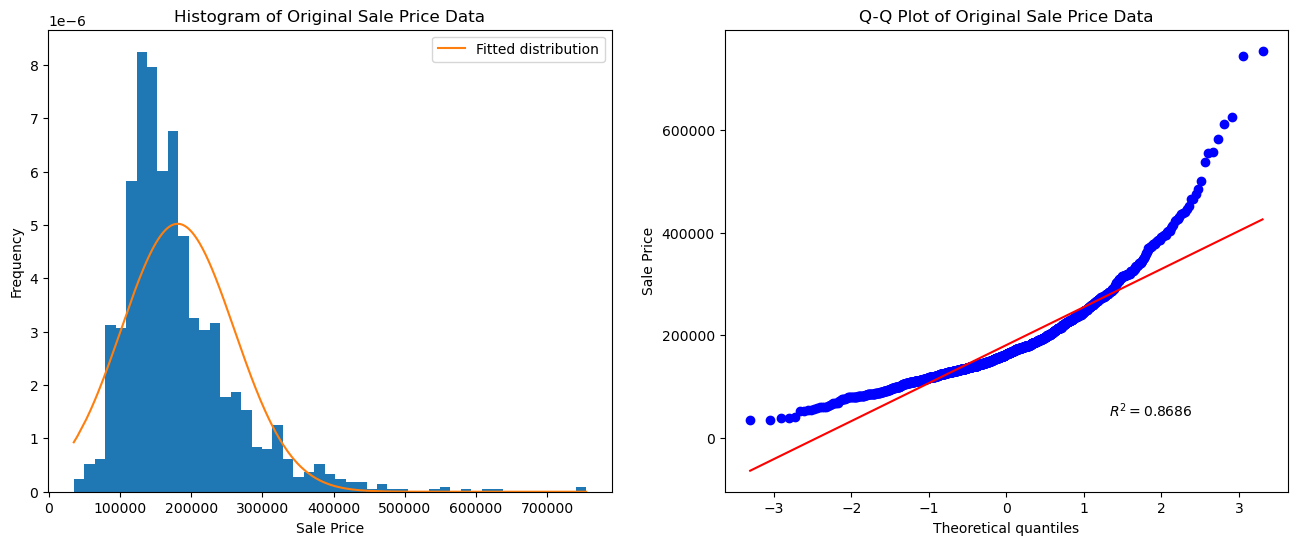

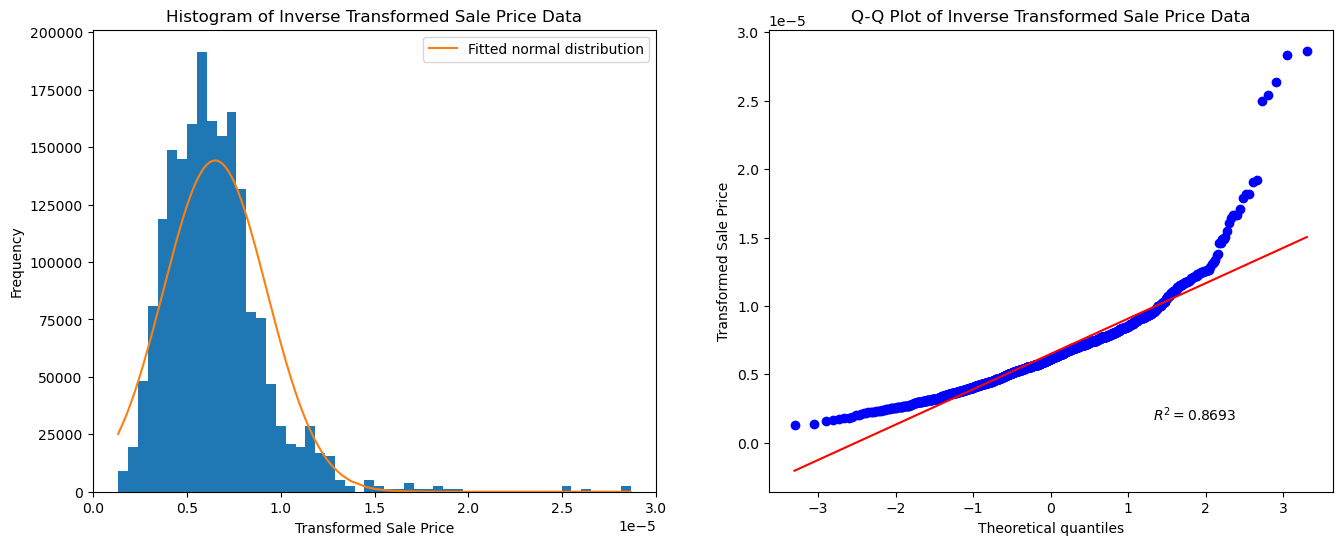

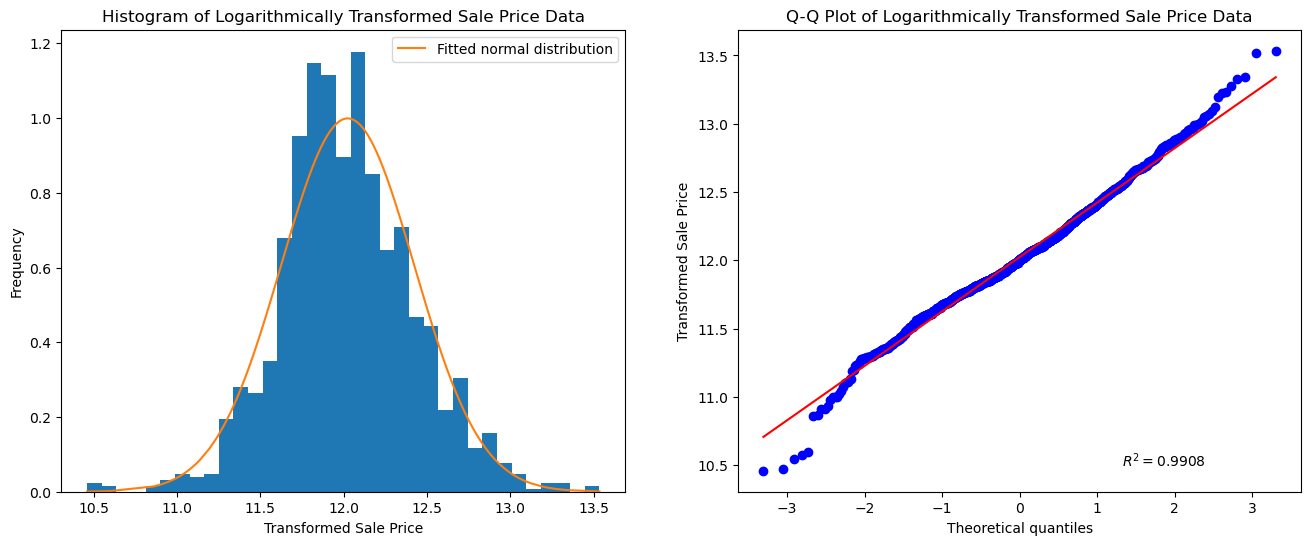

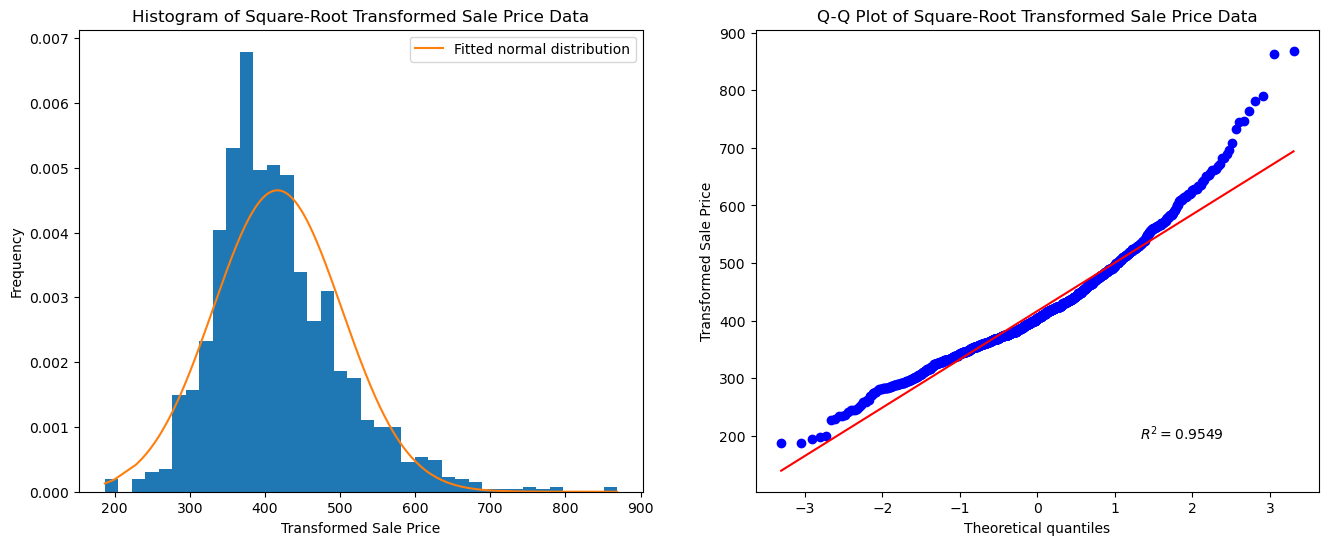

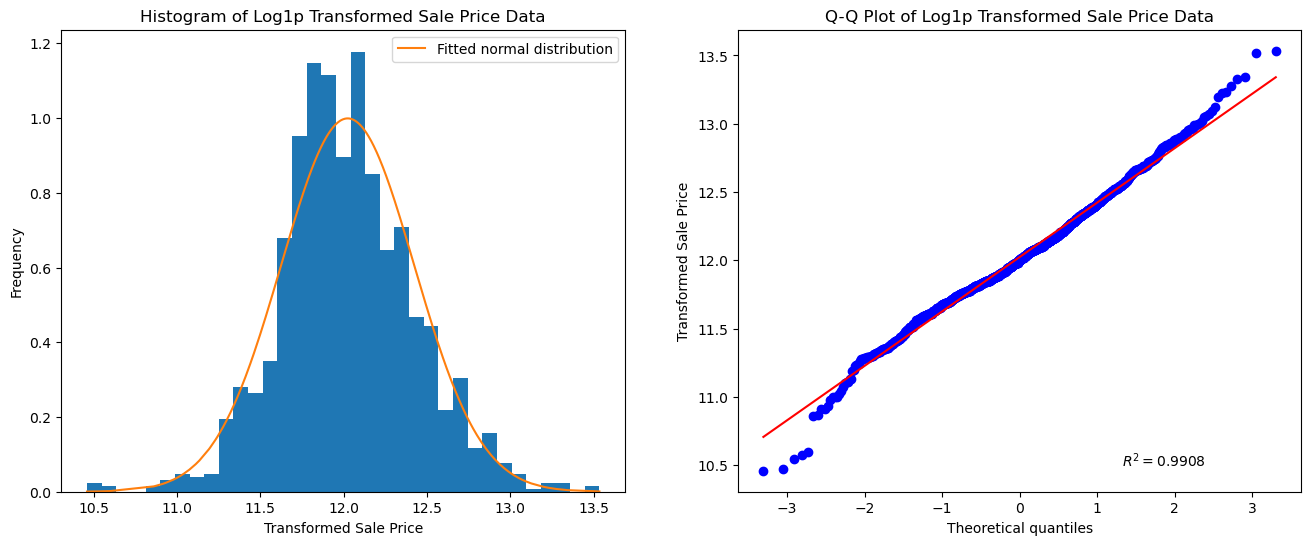

In [141]:
#For Question 1, you can import the following packages:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy.special as special
from sklearn.model_selection  import train_test_split

# Function to fit a normal distribution to data and and calculate pdf normal
def fit_norm_pdf(data):
    mean, std = stats.norm.fit(data)
    sorted_data = np.sort(data)
    pdf = stats.norm.pdf(sorted_data, mean, std)
    return mean, std, pdf

# Function to back transform the data depending on the chosen transform
def back_transform(data,transform_method):
    
    if transform_method == 'LOG':
        transformed_data = np.exp(data)
    
    elif transform_method == 'LOG_1P':
        transformed_data = np.expm1(data)
    
    elif transform_method == 'BOX_COX':
        global lmbda_sale_price
        transformed_data = special.inv_boxcox(data, lmbda_sale_price)
    
    else: 
        print("Please check that you have chosen the correct Transformation name")
    
    return transformed_data

#1.a) Import the dataset Housing.csv into Python as a pandas DataFrame.
#To determine whether a variable is categorical or numerical, please refer to the file data_description.txt.
#Remember that the first column of the csv file is an index column and should not be considered as an explanatory variable.

## ADJUST THE FILE PATH ACCORDING TO YOUR FOLDER STRUCTURE ##
housing_data = pd.read_csv("/home/nilsjohnson/Documents/ETH/MsC/Sem2/ML_F&I/project_1/Housing.csv", index_col= 0)

#1.b) Graphically determine whether the target variable SalePrice is approximately Gaussian.

sale_price_orig = housing_data['SalePrice']

# Perform D'Agostino-Pearson normality test
# stat, p = stats.normaltest(housing_data['SalePrice'])

# print(f"D'Agostino-Pearson normality test for non-transformed data: statistic={stat}, p-value={p}")

# Box-Cox transformation of SalePrice
sale_price_trans_boxcox, lmbda_sale_price = stats.boxcox(housing_data['SalePrice'])

# log1p transformation
sale_price_trans_log1p = np.log1p(sale_price_orig)

# inverse transformation
sale_price_trans_inv = 1 / sale_price_orig

#logarithmic transformation
sale_price_trans_log = np.log(sale_price_orig)

# square-root transformation
sale_price_trans_sqrt = np.sqrt(sale_price_orig)


skewness = sale_price_orig.skew()
print("Skewness of original data:", skewness)
# print("Skewness transformed data", stats.skew(sale_price_trans_boxcox))

kurtosis = sale_price_orig.kurt()
print("Kurtosis of original data:", kurtosis)
# print("kurtosis transformed data", stats.kurtosis(sale_price_trans_boxcox))

# print(f"Optimal λ for Box-Cox: {lmbda_sale_price:.4f}")


sale_price_orig_np = np.array(sale_price_orig)
sale_price_orig_np.sort()
sale_price_trans_sorted = np.sort(sale_price_trans_boxcox)

mean_orig, std_orig = stats.norm.fit(sale_price_orig_np, loc=0)
mean_trans, std_trans = stats.norm.fit(sale_price_trans_sorted, loc=0)

pdf_norm_orig = stats.norm.pdf(sale_price_orig_np, mean_orig, std_orig)
pdf_norm_trans = stats.norm.pdf(sale_price_trans_sorted, mean_trans, std_trans)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# q-q plot original data
prob = stats.probplot(sale_price_orig, dist=stats.norm, plot=ax2, rvalue=True)

# histogram original data
ax1.hist(sale_price_orig_np, bins='auto', density = True)
ax1.plot(sale_price_orig_np, pdf_norm_orig, label='Fitted distribution')
ax1.set_title("Histogram of Original Sale Price Data")
ax1.set_xlabel("Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title('Q-Q Plot of Original Sale Price Data')
ax2.set_ylabel('Sale Price')

plt.show()

# inverse transformation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prob = stats.probplot(sale_price_trans_inv, dist=stats.norm, plot=ax2, rvalue=True)

ax1.hist(sale_price_trans_inv, bins='auto', density = True)
ax1.plot(np.sort(sale_price_trans_inv), fit_norm_pdf(sale_price_trans_inv)[2], label='Fitted normal distribution')
ax1.set_title("Histogram of Inverse Transformed Sale Price Data")
ax1.set_xlabel("Transformed Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title(f'Q-Q Plot of Inverse Transformed Sale Price Data')
ax2.set_ylabel('Transformed Sale Price')

plt.show()

# logarithmic transformation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prob = stats.probplot(sale_price_trans_log, dist=stats.norm, plot=ax2, rvalue=True)

ax1.hist(sale_price_trans_log, bins='auto', density = True)
ax1.plot(np.sort(sale_price_trans_log), fit_norm_pdf(sale_price_trans_log)[2], label='Fitted normal distribution')
ax1.set_title("Histogram of Logarithmically Transformed Sale Price Data")
ax1.set_xlabel("Transformed Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title(f'Q-Q Plot of Logarithmically Transformed Sale Price Data')
ax2.set_ylabel('Transformed Sale Price')

plt.show()

# square-root transformation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prob = stats.probplot(sale_price_trans_sqrt, dist=stats.norm, plot=ax2, rvalue=True)

ax1.hist(sale_price_trans_sqrt, bins='auto', density = True)
ax1.plot(np.sort(sale_price_trans_sqrt), fit_norm_pdf(sale_price_trans_sqrt)[2], label='Fitted normal distribution')
ax1.set_title("Histogram of Square-Root Transformed Sale Price Data")
ax1.set_xlabel("Transformed Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title(f'Q-Q Plot of Square-Root Transformed Sale Price Data')
ax2.set_ylabel('Transformed Sale Price')

plt.show()

# log1p transformation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prob = stats.probplot(sale_price_trans_log1p, dist=stats.norm, plot=ax2, rvalue=True)

ax1.hist(sale_price_trans_log1p, bins='auto', density = True)
ax1.plot(np.sort(sale_price_trans_log1p), fit_norm_pdf(sale_price_trans_log1p)[2], label='Fitted normal distribution')
ax1.set_title("Histogram of Log1p Transformed Sale Price Data")
ax1.set_xlabel("Transformed Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title(f'Q-Q Plot of Log1p Transformed Sale Price Data')
ax2.set_ylabel('Transformed Sale Price')

plt.show()

# Box-Cox transformation

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# prob = stats.probplot(sale_price_trans_boxcox, dist=stats.norm, plot=ax2, rvalue=True)

# ax1.hist(sale_price_trans_boxcox, bins='auto', density = True)
# ax1.plot(np.sort(sale_price_trans_boxcox), fit_norm_pdf(sale_price_trans_boxcox)[2], label='Fitted normal distribution')
# ax1.set_title("Histogram of Box-Cox Transformed Sale Price Data")
# ax1.set_xlabel("Transformed Sale Price")
# ax1.set_ylabel("Frequency")
# ax1.legend()

# ax2.set_title(f'Q-Q Plot of Box-Cox Transformed Sale Price Data')
# ax2.set_ylabel('Transformed Sale Price')

# plt.show()



# Perform D'Agostino-Pearson normality test on transformed data
# stat_transformed, p_transformed = stats.normaltest(sale_price_trans)

# print(f"D'Agostino-Pearson normality test for transformed data: statistic={stat_transformed:.3f}, p-value={p_transformed:.3f}")


#If not, suggest a suitable transformation to bring SalePrice closer to a Gaussian distribution (logarithmic, inverse, square-root, ...).

# As we can see the histogram and q-q plot the original data is not gaussian normally distributed. The data clearly shows a lot of skewness, meaning the
# data is very asymmetric around it's mean. In particullar there is a strong prositive skew with a skewness factor of 1.88. The red line in the q-q plot
# indicates the theoretical quantiles of the reference distribution, which in our case is the normal distribution. The goal is therefore that all of
# the dots in the q-q plot lie along this line. 

#Do not forget to apply this transformation to the target variable SalePrice in the dataset.

#Why is it important to consider such potential transformations?

# In general, we can perform linear regression on data that is not normally distributed. What matters is that the residuals (errors) are 
# approximately normally distributed. If this assumption holds, then the OLS estimators are not only unbiased but also efficient
# (optimal under the Gauss–Markov theorem). Furthermore, normal residuals are especially important when performing statistical inference
# (e.g. t-tests, confidence intervals), because these tests rely on the normality of the error terms for their validity.


# Looking at the different transformations above, we can see that the Box-Cox transformation seems to perform best in terms of making the data
# more normally distributed. This is if we only have a look at the r² data from the transformed q-q plot. Log1p and the log transform are very similar in their r² values.
# From testing our models on the different transformations we did not see a major difference between the log1p and log performance and have therefore decided to go with the log transform
# due to it's simplicity.


sale_price_trans = sale_price_trans_log

# specify the selected transform method ("LOG", "LOG_1P", "BOX_COX",...)
method = "LOG"

#1.c) Split the data into a training set (X,y)_train and a test set (X,y)_test.
#Randomly assign 70% of the observations to the training set and the remaining 30% to the test set.

X = housing_data.drop(columns="SalePrice")
y = sale_price_trans


# Split data, use different random_stat integerst to check if the result is stable across different distinct random seeds
X_train, X_test, y_train_trans, y_test_trans = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#1.d) Replace missing values in X using the training data statistics only -> use .fillna(...)
#For numerical features, replace missing values with the mean of the column .
#For categorical features, replace missing values with the most frequent category.
#You can use the function df.select_dtypes(...) to idetify categorical variables as the variables with type 'object' and 'category'. 
#Some categorical variables admit NA (or None) as a valid category, which should be treated as an actual level and not as missing.

categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# manually need to add feature MSSubclass as it is a categorical feature as well even though it has numerical values

categorical_features.append('MSSubClass')

numerical_features = X_train.drop(columns=categorical_features).columns.tolist()

# print(numerical_features)
# print(len(numerical_features))

# print(categorical_features)
# print(len(categorical_features))

# Features where NA is a valid category
na_valid_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                     'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

# Create new list where NA-valid features from categorical_features list is removed
impute_features = [col for col in categorical_features if col not in na_valid_features]

X_train = X_train.copy()
X_test = X_test.copy()

# replace missing values in X_train where necessary
X_train[impute_features] = X_train[impute_features].fillna(X_train[impute_features].mode().iloc[0])
X_train[numerical_features] = X_train[numerical_features].fillna(X_train[numerical_features].mean())


# replace missing values in X_test from the numerical features in the test set as there are NAs some of the numerical features. 
# Important to use the mean of the training data here to prevent data leakage.
X_test[numerical_features] = X_test[numerical_features].fillna(X_train[numerical_features].mean())

# standardize all numerical features in X_train with z-score transformation and apply the same transformation to X_test
train_means = X_train[numerical_features].mean()
train_stds = X_train[numerical_features].std()


X_train[numerical_features] = (X_train[numerical_features] - train_means) / train_stds
X_test[numerical_features]  = (X_test[numerical_features] - train_means) / train_stds

# helper variable for analysis in 3a
X_train_pre_one_hot = X_train

# one-hot encode categorical features in X_train
X_train = pd.get_dummies(X_train, dummy_na=True, columns=categorical_features)

# one-hot encode categorical features in X_Test
X_test = pd.get_dummies(X_test, dummy_na=True, columns=categorical_features)

# ensure that X_test has the same columns as X_train 
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# list columns that contain any NaN
# print("Cols with NaN:", X_test.columns[X_test.isna().any()].tolist())





### Question 2 - Linear Regression on Numerical Features

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

#2.a) Fit a linear regression model on the training dataset with numerical features only using the sklearn package.
#Output a table with the name of each feature and the associated regression coefficient.

X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]

reg = LinearRegression().fit(X_train_numerical, y_train_trans)

y_pred_train_trans = reg.predict(X_train_numerical)
y_pred_test_trans = reg.predict(X_test_numerical)

# If you transformed the target variable, you have to inverse-transform the predictions before computing MSE and R2, 
# so that these metrics are reported on the original SalePrice scale.

y_pred_train_orig = back_transform(y_pred_train_trans,method)  
y_pred_test_orig = back_transform(y_pred_test_trans,method)

y_train_orig = back_transform(y_train_trans,method)
y_test_orig = back_transform(y_test_trans,method)

#Compare the in-sample and out-of-sample Mean Squared Error (MSE) and R^2.
MSE_train_orig = mean_squared_error(y_train_orig, y_pred_train_orig)
MSE_test_orig = mean_squared_error(y_test_orig, y_pred_test_orig)
R2_train_orig = r2_score(y_train_orig, y_pred_train_orig)
R2_test_orig = r2_score(y_test_orig, y_pred_test_orig)

features = X_train_numerical.values
ones = np.ones((X_train_numerical.shape[0], 1))
A = np.hstack([ones, features])


# and let y ∈ R^m denote the observed target values.
y = y_train_trans.values.reshape(-1, 1)
# (i) Compute the estimated coefficients β for each explanatory variable using the numpy package. 
# Practical note: In code, do not form matrix inverses explicitly; 
# instead use a numerically stable equivalent such as np.linalg.solve(A.T @ A, A.T @ y).
beta_hat = np.linalg.solve(A.T @ A, A.T @ y)


# y_in_sample = reg.predict(X_train)
#Compare the in-sample and out-of-sample Mean Squared Error (MSE) and R^2.
# R_2_in_sample = 
# R_2_out_sample


#2.b) (i) Compute the estimated coefficients for each explanatory variable using the numpy package. 
#Remember that the design matrix A needs to include a column of 1's. Use np.linalg.solve(...).

# (ii) Compute the standard error of each estimated coefficient using the numpy package.

# (iii) Compute the (in-sample) MSE and R^2 using the numpy package.

# (iv) Do the results change using pseudoinversion instead of standard matrix inversion? Use np.linalg.pinv(...).

# (v) Compare your results (with and without pseudoinversion) to the output of the sm.OLS(...) function.

print(X_train.dtypes)
print(X_train_numerical.dtypes)
non_numeric = X_train.select_dtypes(exclude=[np.number])
print(f"Non-numeric columns: {non_numeric.columns.tolist()}")

LotFrontage         float64
LotArea             float64
OverallQual         float64
OverallCond         float64
YearBuilt           float64
                     ...   
MSSubClass_120.0       bool
MSSubClass_160.0       bool
MSSubClass_180.0       bool
MSSubClass_190.0       bool
MSSubClass_nan         bool
Length: 340, dtype: object
LotFrontage      float64
LotArea          float64
OverallQual      float64
OverallCond      float64
YearBuilt        float64
YearRemodAdd     float64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF         float64
2ndFlrSF         float64
LowQualFinSF     float64
GrLivArea        float64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath         float64
HalfBath         float64
BedroomAbvGr     float64
KitchenAbvGr     float64
TotRmsAbvGrd     float64
Fireplaces       float64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF     

### Question 3 - Regularization Techniques

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, RepeatedKFold, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# 3.a) Linear regression with the full Housing dataset (numerical + categorical).
#How do the in-sample and out-of-sample metrics change when including categorical features, and what does this reveal about the model’s ability to generalize?

# The r_2 value increases and MSE decreases significantly for in-sample analysis when adding the categorical features. One does however see that the metrics 
# of the out-of-sample values are drastically worse. This can come from the model overfitting to the training data and therefore not being able to generalize
# when given unseen data. One of the reasons for this happening can come from the fact that we apply one-hot encoding to the categorical features
# in the dataset. One Hot Encoding is a method for converting categorical variables into a binary format. It creates new columns for
# each category where 1 means the category is present and 0 means it is not. For our data set the number of features increases by more than 4 when one-hot 
# encoding. With a relativley small dataset of only 1022 data points the large number of features at 310, when using one-hot encoding, 
# the ratio of data points to features is relativley small which can cause overfitting and drastically reduce the models ability to generalize.

reg_ols = LinearRegression(fit_intercept=True).fit(X_train,y_train_trans)

y_pred_in_sample_ols = reg_ols.predict(X_train)
y_pred_out_sample_ols = reg_ols.predict(X_test)

# If you transformed the target variable, you have to inverse-transform the predictions before computing MSE and R2, 
# so that these metrics are reported on the original SalePrice scale.

y_pred_train_ols = back_transform(y_pred_in_sample_ols,method)    # inverse of log1p
y_pred_test_ols = back_transform(y_pred_out_sample_ols,method)

# for testing purpose to check if it's the only one causing an overflow
y_pred_test_ols = y_pred_out_sample_ols

MSE_in_sample_ols = mean_squared_error(y_train_orig,y_pred_train_ols)
MSE_out_sample_ols = mean_squared_error(y_test_orig,y_pred_test_ols)

print("Number of features before one-hot encoding:", X_train_pre_one_hot.shape[1])
print("Number of features after one-hot encoding:", X_train.shape[1])
print("Shape of X_train", X_train.shape)

Number of features before one-hot encoding: 79
Number of features after one-hot encoding: 340
Shape of X_train (1022, 340)


/tmp/ipykernel_12293/3509847207.py:28: RuntimeWarning: overflow encountered in expm1
  y_pred_test_ols = np.expm1(y_pred_out_sample_ols)


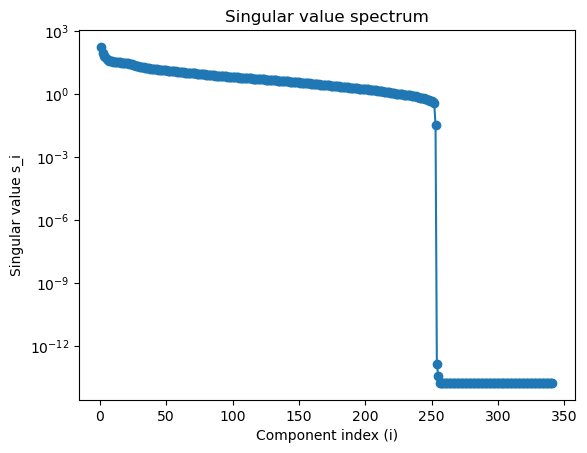

Optimally found k_value for TPI 240


In [ ]:
#3.b) Implement the Truncated Pseudoinverse, Ridge, Lasso, and Elastic Net regularization techniques.
#Use 8-fold cross-validation to tune the hyperparameters of each regularization technique based on the MSE metric.


# Truncated Pseudoinverse

# insepection of svd to determine the range of k to iterate over to find the optimal dimensionality reduction

features = X_train.values
ones = np.ones((X_train.shape[0], 1))
A = np.hstack([ones, features])

# categorical features from one-hot encoding can still have the datatype object and therefore need to be converted to float to be able to use svd function
A = np.asarray(A, dtype=float)

U, s, Vt = np.linalg.svd(A, full_matrices=False)

plt.plot(np.arange(1, len(s)+1), s, marker='o')
plt.xlabel('Component index (i)')
plt.ylabel('Singular value s_i')
plt.title('Singular value spectrum')
plt.yscale('log') 
plt.show()

# calcualtes the truncated pseudoinverse
def truncated_svd_pinv(X, k):

    features = X.values
    ones = np.ones((X.shape[0], 1))
    A = np.hstack([ones, features])
    A = np.asarray(A, dtype=float)

    U, s, Vt = np.linalg.svd(A)
    # Keep only the first k singular values/vectors
    U_k, s_k, Vt_k = U[:, :k], s[:k], Vt[:k, :]
    # Reconstruct rank-k approximation
    A_k = U_k @ np.diag(s_k) @ Vt_k
    # Compute pseudoinverse of truncated matrix
    A_k_pinv = np.linalg.pinv(A_k)

    return A_k_pinv

def cross_validate_tsvd(X, y, k_values, n_splits):
    
    rkf = RepeatedKFold(n_splits=n_splits, random_state=42)
    cv_errors = []

    for k in k_values:
        mse_list = []
        for train_idx, val_idx in rkf.split(X):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            # Fit truncated pseudoinverse on training set
            A_pinv_k = truncated_svd_pinv(X_train, k)
            
            # create the validation design matrix
            features = X_val.values
            ones = np.ones((X_val.shape[0], 1))
            A_val = np.hstack([ones, features])
            A_val = np.asarray(A_val, dtype=float)

            # Predict on validation set
            y_pred = A_val @ (A_pinv_k @ y_train)
            
            # Compute validation MSE
            mse_list.append(mean_squared_error(y_val, y_pred))
        
        cv_errors.append(np.mean(mse_list))

    # get the index of the minimum value in the cv array
    best_k = k_values[np.argmin(cv_errors)]

    return best_k, cv_errors

# from the plot showing the SV spectrum we can see that we can focus our search for the optimal cut off value in the region where the magintude of the SV drops off sharply
k_values = range(240, 255)
best_k, errors = cross_validate_tsvd(X_train, y_train_trans, k_values, n_splits=8)

# set the best_k to a specific value for testing
# best_k = 267
# best_k = 240

print("Optimally found k_value for TPI", best_k)

# Compute pseudoinverse using best_k
X_train_pinv = truncated_svd_pinv(X_train, best_k)

# Fit model 
y = y_train_trans.values.reshape(-1, 1)
w_hat = X_train_pinv @ y

# Build A_train and A_test (with intercept column)
A_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
A_test  = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# Predictions
y_pred_in_sample_tps = np.asarray(A_train @ w_hat, dtype=float)
y_pred_out_sample_tps = np.asarray(A_test @ w_hat, dtype=float)

y_pred_train_tps = back_transform(y_pred_in_sample_tps, method)    
y_pred_test_tps = back_transform(y_pred_out_sample_tps, method)

MSE_in_sample_tps = mean_squared_error(y_train_orig,y_pred_train_tps)
MSE_out_sample_tps = mean_squared_error(y_test_orig,y_pred_test_tps)




In [136]:
# Ridge regularization

# different possible values of alphas 
alpha_vals = np.logspace(-3, 10, 200)

reg_ridge = RidgeCV(alphas = alpha_vals, scoring='neg_mean_squared_error',cv=8).fit(X_train,y_train_trans)

y_pred_in_sample_ridge = reg_ridge.predict(X_train)
y_pred_out_sample_ridge = reg_ridge.predict(X_test)

y_pred_train_ridge = back_transform(y_pred_in_sample_ridge, method)
y_pred_test_ridge = back_transform(y_pred_out_sample_ridge, method)

MSE_in_sample_ridge = mean_squared_error(y_train_orig,y_pred_train_ridge)
MSE_out_sample_ridge = mean_squared_error(y_test_orig,y_pred_test_ridge)



In [137]:
# LassoCV regularization, implement CV by LinearModelCV, with MSE as scoring hard-coded

# different possible values of alphas 
alpha_vals = np.logspace(-3, 10, 200)

reg_lasso = LassoCV(alphas=alpha_vals, cv=8).fit(X_train,y_train_trans)

y_pred_in_sample_lasso = reg_lasso.predict(X_train)
y_pred_out_sample_lasso = reg_lasso.predict(X_test)

y_pred_train_lasso = back_transform(y_pred_in_sample_lasso, method)
y_pred_test_lasso = back_transform(y_pred_out_sample_lasso, method)

MSE_in_sample_lasso = mean_squared_error(y_train_orig,y_pred_train_lasso)
MSE_out_sample_lasso = mean_squared_error(y_test_orig,y_pred_test_lasso)




In [138]:
# Elastic net CV, also here implements CV by LinearModelCV, with MSE as scoring hard-coded

# different possible values of alphas 
alpha_vals = np.logspace(-3, 10, 200)

# different ratios between l1 and l2 penalty to try along the cv  
ratios = [.1 ,.5, .65, .68, .69, .7, .72, .73, .75, .78 , .8 ,.9, .95, .99, 1]

reg_en = ElasticNetCV(l1_ratio=ratios, alphas=alpha_vals, cv=8).fit(X_train,y_train_trans)

y_pred_in_sample_en = reg_en.predict(X_train)
y_pred_out_sample_en = reg_en.predict(X_test)

y_pred_train_en = back_transform(y_pred_in_sample_en, method)
y_pred_test_en = back_transform(y_pred_out_sample_en, method)

MSE_in_sample_en = mean_squared_error(y_train_orig,y_pred_train_en)
MSE_out_sample_en = mean_squared_error(y_test_orig,y_pred_test_en)



In [ ]:
#Why is it important that the intercept is not penalized in these models?

# In Ridge, Lasso, and Elastic Net regression, we minimize an objective function that includes a regularization (penalty) term:
#
#   Loss = (1/n) * Σ (y_i - ŷ_i)²  +  λ * P(β)
#
# where:
#   - ŷ_i = β₀ + Σ X_ij * β_j
#   - β₀ is the intercept (model bias term)
#   - β_j are the feature coefficients
#   - λ controls the regularization strength 
#   - P(β) is the penalty term, defined differently for each method:
#
#     Ridge:        P(β) = Σ (β_j)²
#     Lasso:        P(β) = Σ |β_j|
#     Elastic Net:  P(β) = (1-α) * Σ |β_j| + α * Σ (β_j)²
#
# The intercept (β₀) should NOT be included in the penalty term because it represents the average response of the target variable if all
# predictors were zero, not the relationship between predictors and the outcome. If we were to add β₀ to the Loss function then we would 
# be shrinking the models mean prediction towards zero, regardless of the true mean of y. This would lead to biased predictions as the 
# models intercept would be forced to be around zero eventhough this might not be the case for the true underlying model of the data. 



In [139]:
#Compare their performance in terms of in-sample and out-of-sample MSE and R2 with the linear regressions of Questions 2.a) and 3.a).

# Collect all results in a dictionary
results = {
    "Model": ["OLS (num. features)","OLS (num. + cat. features)", "Truncated Pseudoinverse", "Ridge", "Lasso", "Elastic Net"],
    "MSE (In-Sample)": [
        MSE_train_orig,
        MSE_in_sample_ols,
        MSE_in_sample_tps,
        MSE_in_sample_ridge,
        MSE_in_sample_lasso,
        MSE_in_sample_en
    ],
    "R² (In-Sample)": [
        r2_score(y_train_orig, y_pred_train_orig),
        r2_score(y_train_orig, y_pred_train_ols),
        r2_score(y_train_orig, y_pred_train_tps),
        r2_score(y_train_orig, y_pred_train_ridge),
        r2_score(y_train_orig, y_pred_train_lasso),
        r2_score(y_train_orig, y_pred_train_en)
    ],
    "MSE (Out-of-Sample)": [
        MSE_test_orig,
        MSE_out_sample_ols,
        MSE_out_sample_tps,
        MSE_out_sample_ridge,
        MSE_out_sample_lasso,
        MSE_out_sample_en
    ],
    "R² (Out-of-Sample)": [
        r2_score(y_test_orig, y_pred_test_orig),
        r2_score(y_test_orig, y_pred_test_ols),
        r2_score(y_test_orig, y_pred_test_tps),
        r2_score(y_test_orig, y_pred_test_ridge),
        r2_score(y_test_orig, y_pred_test_lasso),
        r2_score(y_test_orig, y_pred_test_en)
    ]
}

# Create and display the DataFrame
results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)

# Round for readability and control display
pd.set_option('display.float_format', '{:.4f}'.format)
results_df = results_df.round(4)

print("\n=== Model Performance Comparison ===")
print(results_df)

# The ruslts from the model Peformance Comparison show how the regularization improves the models ability to generalie. This might not be as visible of one were to only look at 
# the in-sample R² and MSE results. However, when looking at the out-of-sample results one can clearly see that each regularization method increases the models performance to 
# generalize with OLS regression model ( with num. and cat. features) going from a large negative R² value for out-of-sample data to a R² of 0.908 for out-of-sample data.





=== Model Performance Comparison ===
                            MSE (In-Sample)  R² (In-Sample)  \
Model                                                         
OLS (num. features)         1433638191.8996          0.7618   
OLS (num. + cat. features)   292163376.3808          0.9515   
Truncated Pseudoinverse      340048320.1089          0.9435   
Ridge                        619388560.5137          0.8971   
Lasso                        651476851.2314          0.8918   
Elastic Net                  535475388.4289          0.9110   

                                 MSE (Out-of-Sample)  R² (Out-of-Sample)  
Model                                                                     
OLS (num. features)                   829114946.4459              0.8812  
OLS (num. + cat. features) 46186527480582438912.0000    -6618788604.0287  
Truncated Pseudoinverse              2066920446.3211              0.7038  
Ridge                                 634641631.8951              0.9091  
Lasso  

In [ ]:
#3.c) During cross-validation, what are possible sources of information leakage? 
#Briefly describe what leakage means in this context, and explain what steps you would take to avoid it if you were building a more complete data preprocessing pipeline (e.g., with imputation, scaling, or encoding). 
#You do not need to implement these steps here, only to explain the idea.





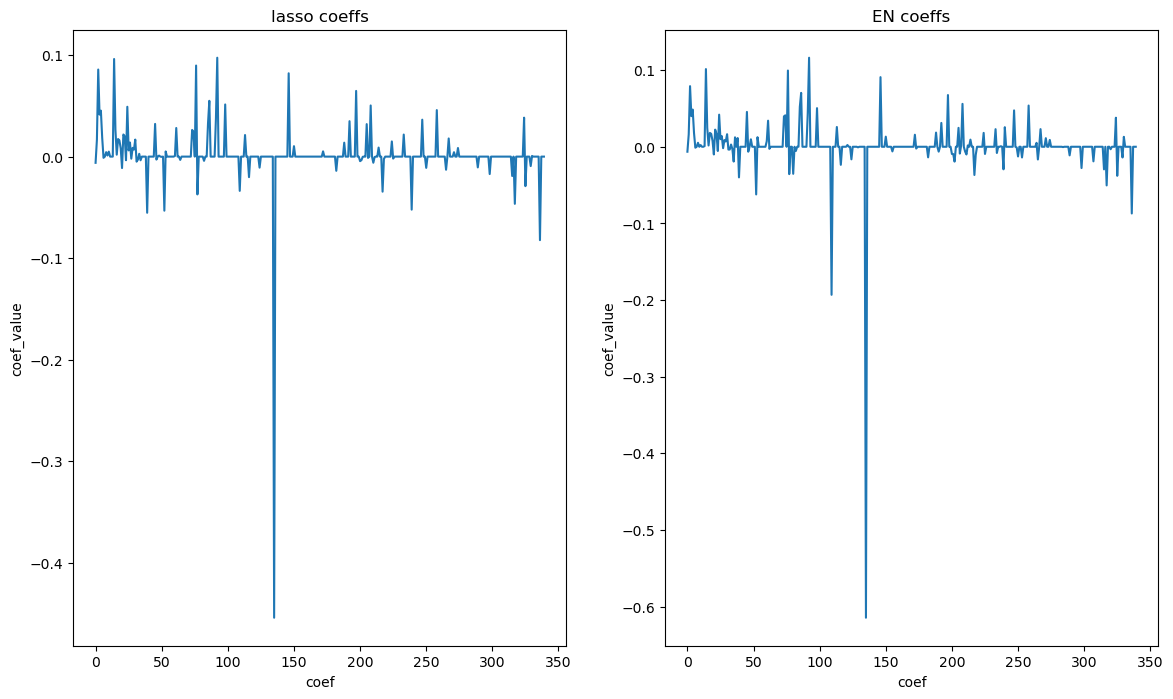

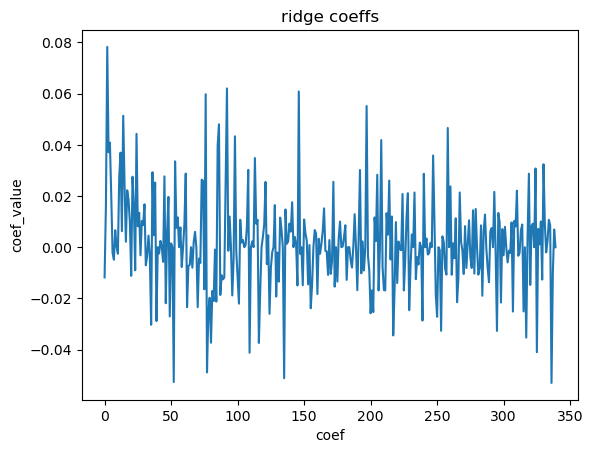


=== Non-zero Coeffs ===
                         # Non-zero Coefficients
Model                                           
Elastic Net                                  113
Lasso                                         95
Ridge                                        310
Truncated Pseudoinverse                      240


In [113]:
#3.d) For the  Lasso and Elastic Net regressions, how many coefficients are non-zero?

#Compare this number with the number of coefficients retained by the Ridge and Truncated Pseudoinverse models and provide an explanation.

coef_lasso = reg_lasso.coef_
coef_en = reg_en.coef_
coef_ridge = reg_ridge.coef_

# plot to show the coefficients and their values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

ax1.plot(coef_lasso)
ax1.set_xlabel('coef')
ax1.set_ylabel('coef_value')
ax1.set_title('lasso coeffs')

ax2.plot(coef_en)
ax2.set_xlabel('coef')
ax2.set_ylabel('coef_value')
ax2.set_title('EN coeffs')

plt.show()

# plot to show the coefficients and their values
plt.plot(coef_ridge)
plt.xlabel('coef')
plt.ylabel('coef_value')
plt.title('ridge coeffs')
plt.show()

# extract the non-zero coefficients and calculate the sum
nz_coef_lasso = np.nonzero(coef_lasso)
nz_coef_en = np.nonzero(coef_en)
nz_coef_ridge = np.nonzero(coef_ridge)
nz_coef_TPSI = best_k

results = {
    "Model": ["Elastic Net","Lasso", "Ridge", "Truncated Pseudoinverse"],
    "# Non-zero Coefficients": [
        np.size(nz_coef_en),
        np.size(nz_coef_lasso),
        np.size(nz_coef_ridge),
        nz_coef_TPSI
    ],
}

#Create and display the DataFrame
results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)

# Round for readability and control display
pd.set_option('display.float_format', '{:.4f}'.format)
results_df = results_df.round(4)

print("\n=== Non-zero Coeffs ===")
print(results_df)

# The reason there are different number of non-zero coefficients comes from the fact that the coefficients are handeld differently in the different model types.

## Truncated Pseudoinverse: In the truncated Pseudoinverste method we choose a specific value at which we want to truncate our design matrix. With the hyperparameter k we set the dimension to which we want to reduce to and therefore remove all other features.
# To find the optimal k value we can look at the magintude of the singular values and then run a cross validation around the component index where we see a strong decrease in the magnitude of the singular value. Then we can use a range around this parameter
# to run CV and then find the optimal value at which to truncate our matrix.

## Ridge: Ridge regression introduces a L2 penalty (also called L2 regularization) which is the sum of the squares of the model's coefficients. This penalty term reduces the size of large coefficients but keeps all features in the model.
# It does not set coefficients to zero.

## Lasso: Lasso regression addresses overfitting by adding an L1 penalty i.e sum of absolute coefficients to the model's loss function. This encourages some coefficients to become exactly zero helps in effectively removing less important features. 
# Lasso regression is therefore a sparsifier of the solution as it get's rid of any features which are irrelevant for the model. 

## Elastic Net: Elastic net regression combines both L1 (Lasso) and L2 (Ridge) penalties to perform feature selection, manage multicollinearity and balancing coefficient shrinkage.
# Elastic net is therefore good when we want to shrink some of the coefficients and remove the others. 



In [ ]:

#3.e) #Based on your findings from Questions 2 and 3, which model would you recommend for predicting house prices? 
#Justify your choice not only by comparing performance metrics, but also by discussing the nature of the problem (e.g., number of features, presence of categorical variables, potential collinearity, sparsity, nonlinearity). 
#Explain how the strengths and limitations of the chosen method align with this problem structure.

# By taking a brief look at the metrics one would be advised to choose the Elastic Net model for prediciting the house prices. It is important that one doesn't only look at the in-sample data as the metrics here can be misleading. A high r² value in the in-sample
# data set can hint to overfitting. This is clearly visible when comparing the in-sample to out-of-sample r² values for the OLS regression. In-sample has the highest r² value of all the models, however when validating the model 
# on the out-of-sample data it becomes clear that this model is totally overfitting to the training data. The negative r² means that we would actually just be better off to predicting the mean than using this model for predicting the house prices.
# Analyzing the nature of the problem at hand and the given data set we can see that we are given very high dimensional data. This comes from the fact that there is a lot of categorical features in the data set. To be able to 
# create a linear regression model with this data we need to use one-hot encoding for the categorical features and this leads to an increases by more than 4 of the feature size. The ratio of data points to features therefore goes from 12.93 before one-hot encoding
# all the way down to 3.29. A simple rule of thumb tells us that our data point to feature ratio should be at least larger than 10 for OLS regression. With this large drop in the ratio it becomes clear that one needs to use a regularization method to shrink and 
# sparsify our design matrix and therefore being able to reduce overfitting and handle multicollinearity.

# To analyze the multicollinearity of the given data we can use the variance inflation factor formula (VIF = 1/1-r²). It can do this by regressing each independant variable agains all other independant variables in the model to calculate the coefficient of determination, 
# denoted by r² in it's formula. The r² value shows how well one feature can be predicted from others with values ranging from 0-1. A higher r² thus means a stronger relationship of one variable with the other variables. From the formula we can see that a higher r² will lead
# to a higher VIF score and therefore a higher VIF score denotes a higher correlations. Generally a VIF above 10 signal a problematic multicollinearity between the features and action like regularization is needed. In our data set we see that 316 of the features have a VIF score above 10
# and therefore it is highly multicollinear. To adress this problem we can use Ridge Regression as it shrinks coefficients of highly correlated features. In simple OLS the coefficients are calculated by β^​=(X^T * X)⁻1 * X^T * y , where (X^T * X) denotes the covariance between the features.
# If this values is large, then we will have large coefficients for these features. Ridge Regression takles this problem by calculating the so called Ridge Loss, shown in the Loss function above, and penalizes large coefficients. 

# Multicollinearity is however not the only problem which can be present in our data set. A large number of irrelevant features in our dataset can also lead to overfitting. To analyze this we can have a look at the correlation of the features we use to train our
# model to our target variable the Sale price. In the Histogram and box plot below it is clearly visible that most of the features have very little correlation to the SalePrice. With the L1 regularization penalty Lasso can shrink coefficients of non important features
# all the way to zero and therefore lead to sparse solutions for β^.

# As we have seen our data set has high multicollinearity and a lot of irrelevant features. To not run the risk of setting an important feature to zero with Lasso but also be able to sparsify β^ we can use the Elastic Net Regression model which tries to find the best 
# tradeoff between the two. Therefore for our data set we would propose using the Elastic Net regression model to predict the housing prices.



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcualting VIF score of all the features used to train our model

# convert all values from X_train to float for VIF calculation
X_train_vif = X_train.astype(float)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i)
                   for i in range(X_train_vif.shape[1])]

# Keep only features with VIF ≤ 10
vif_data_smaller_10 = vif_data[vif_data["VIF"] <= 10]

# identify all the features with large VIF
large_vif = X_train.shape[1]-len(vif_data_smaller_10)

print("Number of features with VIF > 10:", large_vif)


/home/nilsjohnson/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/home/nilsjohnson/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Number of features with VIF > 10 316


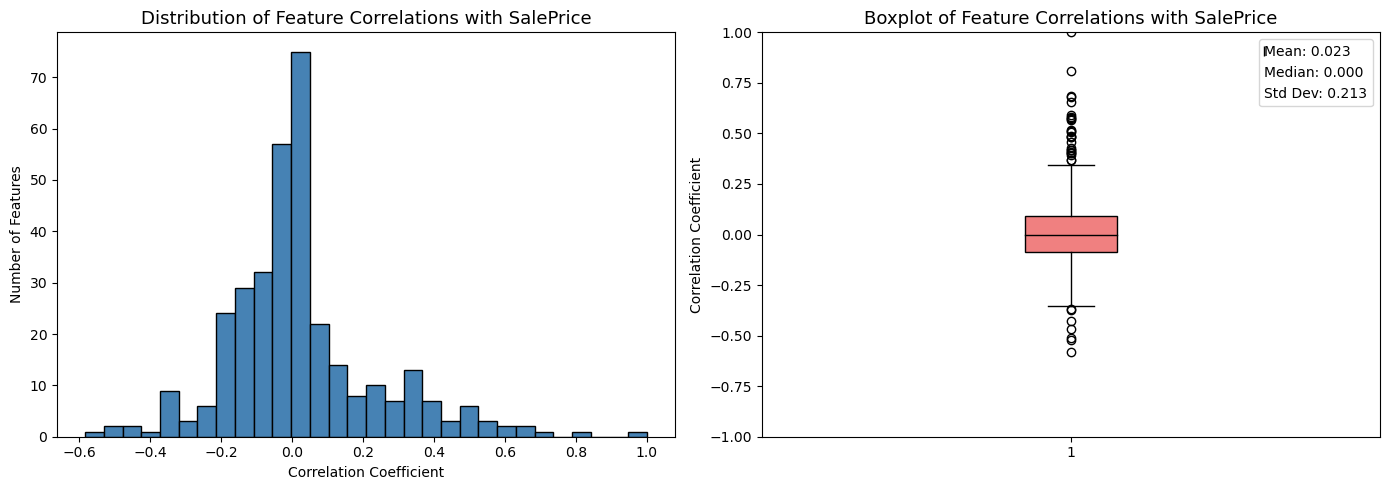

In [99]:
# Correlation of training data with 'SalePrice' calculation

train_data_set_transformed = pd.concat([X_train, y_train_trans], axis=1)


# Calculate the correlation of all training features with 'SalePrice'
correlations = train_data_set_transformed.corr(method='pearson',numeric_only=False)['SalePrice'].sort_values(ascending=False)

# NaN values in the pearson correlation coefficient means there is no correlation at all between the two values. We replace them with zero for plotting.
correlations = correlations.fillna(0)

# Calculate summary statistics
mean_corr = np.mean(correlations)
median_corr = np.median(correlations)
std_corr = np.std(correlations)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram (left)
axes[0].hist(correlations.values, bins=30, color='steelblue', edgecolor='black')
axes[0].set_title("Distribution of Feature Correlations with SalePrice", fontsize=13)
axes[0].set_xlabel("Correlation Coefficient")
axes[0].set_ylabel("Number of Features")

# Boxplot (right)
axes[1].boxplot(
    correlations.values,
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightcoral', color='black'),
    medianprops=dict(color='black')
)
axes[1].set_title("Boxplot of Feature Correlations with SalePrice", fontsize=13)
axes[1].set_ylabel("Correlation Coefficient")
axes[1].set_ylim(-1, 1)

# Add a text-only legend
legend_labels = [
    f"Mean: {mean_corr:.3f}",
    f"Median: {median_corr:.3f}",
    f"Std Dev: {std_corr:.3f}"
]
axes[1].legend(
    legend_labels,
    loc='upper right',
    fontsize=10,
    frameon=True,
    handlelength=0,
    handletextpad=0
)

# Adjust layout
plt.tight_layout()
plt.show()